In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from PIL import Image

import re
from collections import Counter

from wordcloud import WordCloud
import pymongo


%matplotlib inline

In [2]:
from util import MONGO_URI
from util import MONGO_DATABASE

In [3]:
client = pymongo.MongoClient(MONGO_URI)
db = client[MONGO_DATABASE]

In [4]:
stop_words = set(stopwords.words("portuguese"))
type(stop_words)

set

In [5]:
cidades = db.projetos.distinct("cidade")
cidades = sorted(cidades)

cidades

['Abatiá',
 'Agudos do Sul',
 'Almirante Tamandaré',
 'Altônia',
 'Ampére',
 'Andirá',
 'Apucarana',
 'Arapongas',
 'Araruna',
 'Araucária',
 'Assaí',
 'Assis Chateaubriand',
 'Astorga',
 'Bandeirantes',
 'Bela Vista da Caroba',
 'Bela Vista do Paraíso',
 'Bituruna',
 'Bom Sucesso do Sul',
 'Cambará',
 'Cambira',
 'Cambé',
 'Campina Grande do Sul',
 'Campo Largo',
 'Campo Magro',
 'Campo Mourão',
 'Candói',
 'Carlópolis',
 'Cascavel',
 'Chopinzinho',
 'Cianorte',
 'Clevelândia',
 'Colombo',
 'Cornélio Procópio',
 'Coronel Vivida',
 'Curitiba',
 "Diamante D'Oeste",
 'Dois Vizinhos',
 'Douradina',
 'Esperança Nova',
 'Faxinal',
 'Fazenda Rio Grande',
 'Formosa do Oeste',
 'Foz do Iguaçu',
 'Francisco Beltrão',
 'Goioerê',
 'Guairaçá',
 'Guarapuava',
 'Guaraqueçaba',
 'Guaratuba',
 'Honório Serpa',
 'Ibaiti',
 'Ibiporã',
 'Icaraíma',
 'Iguaraçu',
 'Irati',
 "Itapejara d'Oeste",
 'Ivaiporã',
 'Jacarezinho',
 'Jandaia do Sul',
 'Jesuítas',
 'Joaquim Távora',
 'Lapa',
 'Laranjeiras do Sul',


In [6]:
len(cidades)

139

In [103]:
cursor = db.projetos.find({"cidade" : "Santo Antônio da Platina"})
tags = Counter()
tokenizer = RegexpTokenizer(r'\w+')

for item in cursor:
    texto = item.get('problema','')
#     texto = re.sub('Texto publicado com autorização','',texto) # se o tópico a ser analisado for 'diferencial'
    
    token = tokenizer.tokenize(texto)
    for t in token:
        t = t.lower()
        if (t not in stop_words) and (not t.isdigit()) and (len(t) > 2) :
            tags.update([t])
        

In [104]:
len(tags)

1092

In [105]:
import numpy as np
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

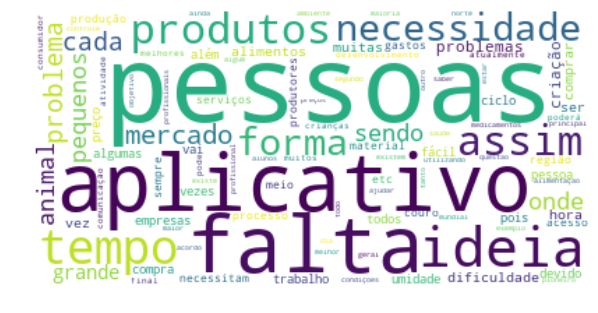

In [106]:
wc = WordCloud(background_color="white", max_words=100)

# generate word cloud
wc.generate_from_frequencies(tags)

# show
plt.figure(figsize=(10,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [107]:
tags['pessoas']

20

In [108]:
tags['brasil']

2

In [109]:
tags['mercado']

9

In [110]:
tags['aplicativo']

10